<p style="text-align:center">
    <a href="https://www.linkedin.com/company/mt-learners/" target="_blank">
    <img src="https://github.com/Mr-MeerMoazzam/Mr-MeerMoazzam/blob/main/Untitled-2.jpg?raw=true" width="200" alt="MT Learners Logo"  />
    </a>
</p>


# Backpropagation


## Overview
This notebook will employ backpropagation to train a single-hidden-layer multi-layer perceptron, whereby diverse patterns will be explored to observe the rate at which weights converge. The effects and correlations between various parameters such as the learning rate, number of iterations, and number of data points will be studied as well.





In [3]:
#Setup
import numpy as np
import matplotlib.pyplot as plt


In this notebook, we will write code to create a multi-layer perceptron that includes a single hidden layer (with 4 nodes) and train it via back-propagation by following these steps:

1. Randomly initialize the weights within the range of -1 to 1
1. Conduct the feed-forward computation
1. Calculate the loss function
1. Use back-propagation to compute gradients for all weights
1. Update the weight matrices with a learning_rate parameter
1. Repeat steps 2-5 for a predetermined number of iterations
1. Plot the accuracies and log loss to analyze changes over time

Once the code is operational, we can investigate the following queries:

- Which patterns were easily learned by the neural network, and which ones took more time?
- What were the effective learning rates and numbers of iterations?
- If time permits, we can modify the hidden layer size and experiment with different activation functions such as ReLu.






shape of x_mat_full is (500, 3)
shape of y is (500,)


/tmp/ipykernel_65264/309342056.py:32: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "ro" (-> color='r'). The keyword argument will take precedence.
  ax.plot(x_mat_full[y==1, 0],x_mat_full[y==1, 1], 'ro', label='class 1', color='darkslateblue')
/tmp/ipykernel_65264/309342056.py:33: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bx" (-> color='b'). The keyword argument will take precedence.
  ax.plot(x_mat_full[y==0, 0],x_mat_full[y==0, 1], 'bx', label='class 0', color='chocolate')


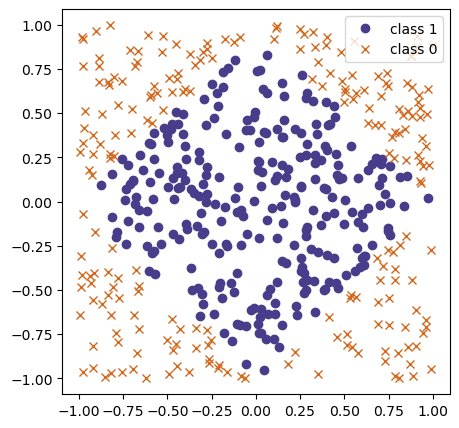

In [4]:
## This code below generates two x values and a y value according to different patterns
## It also creates a "bias" term (a vector of 1s)
## The goal is then to learn the mapping from x to y using a neural network via back-propagation

num_obs = 500
x_mat_1 = np.random.uniform(-1,1,size = (num_obs,2))
x_mat_bias = np.ones((num_obs,1))
x_mat_full = np.concatenate( (x_mat_1,x_mat_bias), axis=1)

# PICK ONE PATTERN BELOW and comment out the rest.

# # Circle pattern
# y = (np.sqrt(x_mat_full[:,0]**2 + x_mat_full[:,1]**2)<.75).astype(int)

# # Diamond Pattern
y = ((np.abs(x_mat_full[:,0]) + np.abs(x_mat_full[:,1]))<1).astype(int)

# # Centered square
# y = ((np.maximum(np.abs(x_mat_full[:,0]), np.abs(x_mat_full[:,1])))<.5).astype(int)

# # Thick Right Angle pattern
# y = (((np.maximum((x_mat_full[:,0]), (x_mat_full[:,1])))<.5) & ((np.maximum((x_mat_full[:,0]), (x_mat_full[:,1])))>-.5)).astype(int)

# # Thin right angle pattern
# y = (((np.maximum((x_mat_full[:,0]), (x_mat_full[:,1])))<.5) & ((np.maximum((x_mat_full[:,0]), (x_mat_full[:,1])))>0)).astype(int)


print('shape of x_mat_full is {}'.format(x_mat_full.shape))
print('shape of y is {}'.format(y.shape))

fig, ax = plt.subplots(figsize=(5, 5))
ax.plot(x_mat_full[y==1, 0],x_mat_full[y==1, 1], 'ro', label='class 1', color='darkslateblue')
ax.plot(x_mat_full[y==0, 0],x_mat_full[y==0, 1], 'bx', label='class 0', color='chocolate')
# ax.grid(True)
ax.legend(loc='best')
ax.axis('equal');

Here are some helper functions


In [5]:
def sigmoid(x):
    """
    Sigmoid function
    """
    return 1.0 / (1.0 + np.exp(-x))


def loss_fn(y_true, y_pred, eps=1e-16):
    """
    Loss function we would like to optimize (minimize)
    We are using Logarithmic Loss
    http://scikit-learn.org/stable/modules/model_evaluation.html#log-loss
    """
    y_pred = np.maximum(y_pred,eps)
    y_pred = np.minimum(y_pred,(1-eps))
    return -(np.sum(y_true * np.log(y_pred)) + np.sum((1-y_true)*np.log(1-y_pred)))/len(y_true)


def forward_pass(W1, W2):
    """
    Does a forward computation of the neural network
    Takes the input `x_mat` (global variable) and produces the output `y_pred`
    Also produces the gradient of the log loss function
    """
    global x_mat
    global y
    global num_
    # First, compute the new predictions `y_pred`
    z_2 = np.dot(x_mat, W_1)
    a_2 = sigmoid(z_2)
    z_3 = np.dot(a_2, W_2)
    y_pred = sigmoid(z_3).reshape((len(x_mat),))
    # Now compute the gradient
    J_z_3_grad = -y + y_pred
    J_W_2_grad = np.dot(J_z_3_grad, a_2)
    a_2_z_2_grad = sigmoid(z_2)*(1-sigmoid(z_2))
    J_W_1_grad = (np.dot((J_z_3_grad).reshape(-1,1), W_2.reshape(-1,1).T)*a_2_z_2_grad).T.dot(x_mat).T
    gradient = (J_W_1_grad, J_W_2_grad)
    
    # return
    return y_pred, gradient


def plot_loss_accuracy(loss_vals, accuracies):
    fig = plt.figure(figsize=(16, 8))
    fig.suptitle('Log Loss and Accuracy over iterations')
    
    ax = fig.add_subplot(1, 2, 1)
    ax.plot(loss_vals)
    ax.grid(True)
    ax.set(xlabel='iterations', title='Log Loss')
    
    ax = fig.add_subplot(1, 2, 2)
    ax.plot(accuracies)
    ax.grid(True)
    ax.set(xlabel='iterations', title='Accuracy');

iteration 0, log loss is 0.8636, accuracy is 0.446
iteration 200, log loss is 0.6777, accuracy is 0.612
iteration 400, log loss is 0.6582, accuracy is 0.732
iteration 600, log loss is 0.5994, accuracy is 0.722
iteration 800, log loss is 0.5377, accuracy is 0.758
iteration 1000, log loss is 0.5111, accuracy is 0.748
iteration 1200, log loss is 0.4666, accuracy is 0.78
iteration 1400, log loss is 0.3741, accuracy is 0.872
iteration 1600, log loss is 0.3097, accuracy is 0.916
iteration 1800, log loss is 0.2768, accuracy is 0.918
iteration 2000, log loss is 0.2565, accuracy is 0.918
iteration 2200, log loss is 0.2415, accuracy is 0.92
iteration 2400, log loss is 0.2289, accuracy is 0.92
iteration 2600, log loss is 0.2173, accuracy is 0.926
iteration 2800, log loss is 0.2056, accuracy is 0.938
iteration 3000, log loss is 0.1939, accuracy is 0.946
iteration 3200, log loss is 0.1834, accuracy is 0.952
iteration 3400, log loss is 0.1743, accuracy is 0.96
iteration 3600, log loss is 0.1666, acc

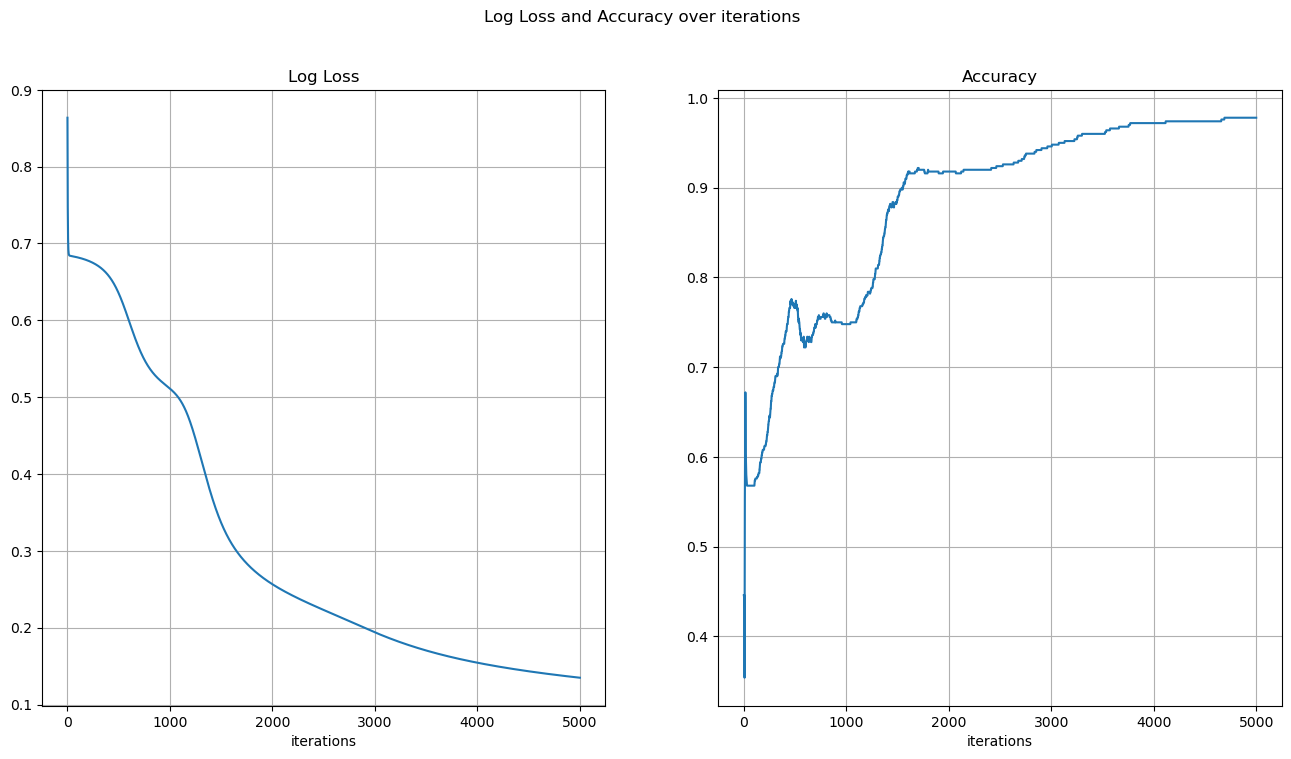

In [6]:
#### Initialize the network parameters

np.random.seed(1241)

W_1 = np.random.uniform(-1,1,size=(3,4))
W_2 = np.random.uniform(-1,1,size=(4))
num_iter = 5000
learning_rate = .001
x_mat = x_mat_full


loss_vals, accuracies = [], []
for i in range(num_iter):
    ### Do a forward computation, and get the gradient
    y_pred, (J_W_1_grad, J_W_2_grad) = forward_pass(W_1, W_2)
    
    ## Update the weight matrices
    W_1 = W_1 - learning_rate*J_W_1_grad 
    W_2 = W_2 - learning_rate*J_W_2_grad
    
    ### Compute the loss and accuracy
    curr_loss = loss_fn(y,y_pred)
    loss_vals.append(curr_loss)
    acc = np.sum((y_pred>=.5) == y)/num_obs
    accuracies.append(acc)

    ## Print the loss and accuracy for every 200th iteration
    if((i%200) == 0):
        print('iteration {}, log loss is {:.4f}, accuracy is {}'.format(
            i, curr_loss, acc
        ))
plot_loss_accuracy(loss_vals, accuracies)

Plot the predicted answers, with mistakes in yellow


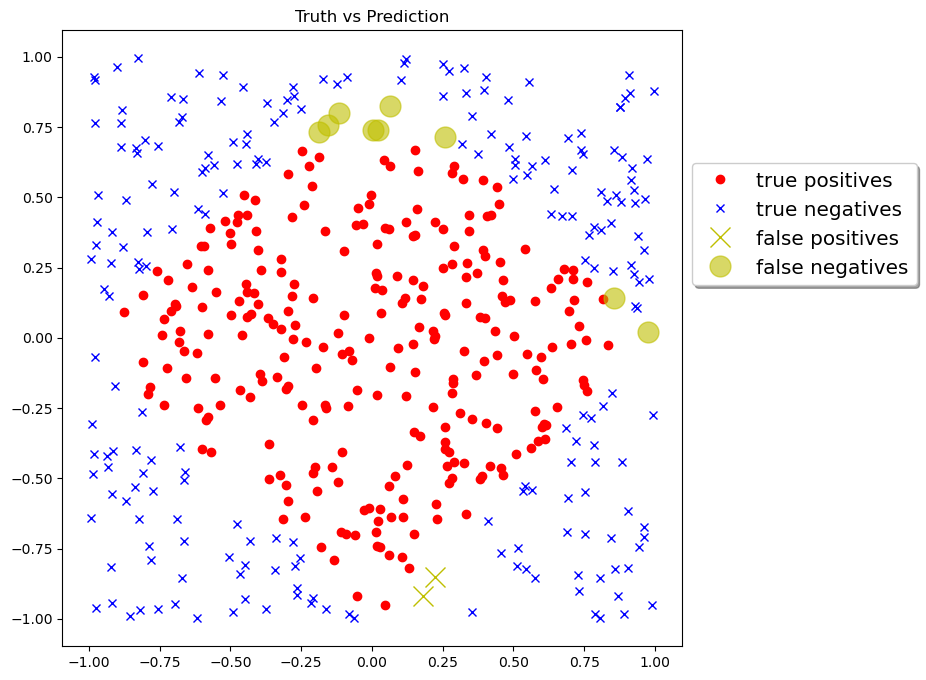

In [7]:
pred1 = (y_pred>=.5)
pred0 = (y_pred<.5)

fig, ax = plt.subplots(figsize=(8, 8))
# true predictions
ax.plot(x_mat[pred1 & (y==1),0],x_mat[pred1 & (y==1),1], 'ro', label='true positives')
ax.plot(x_mat[pred0 & (y==0),0],x_mat[pred0 & (y==0),1], 'bx', label='true negatives')
# false predictions
ax.plot(x_mat[pred1 & (y==0),0],x_mat[pred1 & (y==0),1], 'yx', label='false positives', markersize=15)
ax.plot(x_mat[pred0 & (y==1),0],x_mat[pred0 & (y==1),1], 'yo', label='false negatives', markersize=15, alpha=.6)
ax.set(title='Truth vs Prediction')
ax.legend(bbox_to_anchor=(1, 0.8), fancybox=True, shadow=True, fontsize='x-large');

## Authors


[Moazzam Ali](https://www.linkedin.com/in/moazzam-ali-6a9675237/) is a Associate ML Engineer and CEO of [MT Learners](https://www.linkedin.com/company/mt-learners/).
